In [3]:

from google.cloud import bigquery
from google.cloud import bigquery_storage_v1beta1
from google.oauth2 import service_account
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# -- Setting up BQ connection
key_path = "/Users/annesophie.karmel/service_account_gcp/tvlk-data-payment-dev-4b50fd9a14e9.json"
credentials = service_account.Credentials.from_service_account_file(
     key_path,
     scopes=["https://www.googleapis.com/auth/cloud-platform"],
)

client = bigquery.Client(
    project=credentials.project_id,
    credentials=credentials
)

bqstorageclient = bigquery_storage_v1beta1.BigQueryStorageClient(
    credentials=credentials
)

job_config = bigquery.QueryJobConfig(dry_run=True, use_query_cache=False)

In [5]:
# -- Upload the data
sql_query = ('''SELECT * FROM `tvlk-data-payment-dev.ask_playground.tx_mycards_ins_users_180d_032020` 
    where payment_dt >= date_sub(current_date, interval 30 day) ''')
query_job = client.query(sql_query)  # API request
df = query_job.to_dataframe(bqstorage_client=bqstorageclient)

In [6]:
df.head()

,invoice_id,profile_id,payment_method,payment_scope,saved_payment_method,selected_installment,product_type,currency,amount,payment_dt
0,1659976392910075468,13220494,BCA_KLIKPAY,BCA_KLIKPAY,None,None,TRAIN,IDR,107359,2020-03-01
1,1659980987052873544,15946217,ONEPAY,onepay,None,None,FLIGHT,VND,1166221,2020-03-01
2,1659929385609754188,144099145,CREDIT_CARD,cybersource_bni_2d_IDR_in6,NOT_USING,REGULER-BNI-6BLN,TRAIN,IDR,929207,2020-03-01
3,1659956423592800849,154775302,CREDIT_CARD,cybersource_vietin_3ds_VND,NOT_USING,None,HOTEL,VND,1079435,2020-03-01
4,1659917617563987553,161183675,None,kasikorn_THB,None,None,FLIGHT,THB,127018,2020-03-01


In [7]:
# -- Upload the data (month by month)
sql_query = ('''SELECT * FROM `tvlk-data-payment-dev.ask_playground.tx_mycards_ins_users_180d_032020` 
    where payment_dt >= date_sub(date_sub(current_date, interval 30 day),interval 30 day) ''')
query_job = client.query(sql_query)  # API request
df_60d_30d = query_job.to_dataframe(bqstorage_client=bqstorageclient)

In [8]:
# -- Upload the data
sql_query = ('''SELECT * FROM `tvlk-data-payment-dev.ask_playground.tx_mycards_ins_users_180d_032020` 
    where payment_dt >=date_sub(date_sub(current_date, interval 60 day),interval 30 day) ''')
query_job = client.query(sql_query)  # API request
df_90d_30d = query_job.to_dataframe(bqstorage_client=bqstorageclient)

In [9]:
# -- Upload the data
sql_query = ('''SELECT * FROM `tvlk-data-payment-dev.ask_playground.tx_mycards_ins_users_180d_032020` 
    where payment_dt >=date_sub(date_sub(current_date, interval 90 day),interval 30 day) ''')
query_job = client.query(sql_query)  # API request
df_120d_30d = query_job.to_dataframe(bqstorage_client=bqstorageclient)

In [10]:
# -- Upload the data
sql_query = ('''SELECT * FROM `tvlk-data-payment-dev.ask_playground.tx_mycards_ins_users_180d_032020` 
    where payment_dt >=date_sub(date_sub(current_date, interval 120 day),interval 30 day) ''')
query_job = client.query(sql_query)  # API request
df_150d_30d = query_job.to_dataframe(bqstorage_client=bqstorageclient)

In [11]:
# -- Upload the data
sql_query = ('''SELECT * FROM `tvlk-data-payment-dev.ask_playground.tx_mycards_ins_users_180d_032020` 
    where payment_dt >=date_sub(date_sub(current_date, interval 150 day),interval 30 day) ''')
query_job = client.query(sql_query)  # API request
df_180d_30d = query_job.to_dataframe(bqstorage_client=bqstorageclient)

In [12]:
df_transform = df.copy()

In [13]:
df_transform = df_transform.append(df_60d_30d)

In [14]:
df_transform = df_transform.append(df_90d_30d)
df_transform = df_transform.append(df_120d_30d)
df_transform = df_transform.append(df_150d_30d)

In [15]:
# Setting the index in datetime format
df_transform['payment_dt']=pd.to_datetime(df_transform['payment_dt'],format='%Y-%m-%d')
df_transform = df_transform.set_index(pd.DatetimeIndex(df_transform['payment_dt']))

In [16]:
df_transform.payment_dt.min()

Timestamp('2019-10-06 00:00:00')

In [21]:
df_transform.to_csv('../data/cc_instalment_profiles.csv', index=False)  

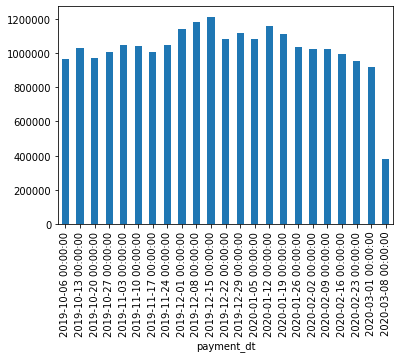

In [33]:
df_transform[df_transform['currency']=='IDR']['amount'].resample('W').mean().plot.bar()

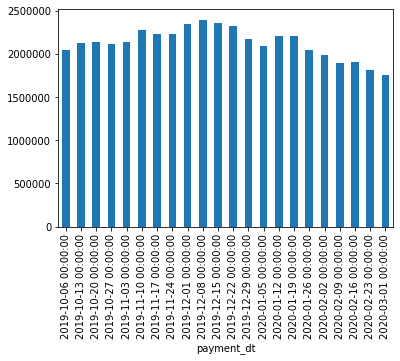

In [34]:
df_transform[~df_transform['selected_installment'].isna()]['amount'].resample('W').mean().plot.bar()

In [2]:
df_transform[df_transform['payment_method']=='CREDIT_CARD']['amount'].resample('W').mean().plot.bar()

NameError: name 'df_transform' is not defined